### P1: Summarization
### P2: Sentiment Analysis
### P3: Event Extraction and Visualization (NER, spacy)
### p4: Translation


In [1]:
import re
import docx 
import os
import PyPDF2
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from textblob import TextBlob
from translate import Translator
import spacy
import matplotlib.pyplot as plt
import requests 


### Using normal Text

In [2]:
# Input text - to summarize
text = " There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them. Summarization can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning. One benefit of this will be, you don’t need to train and build a model prior start using it for your project. It’s good to understand Cosine similarity to make the best use of the code you are going to see. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Its measures cosine of the angle between vectors. The angle will be 0 if sentences are similar.  "

In [48]:
file_path = 'test.txt' 

with open(file_path, 'r') as file:
    text = file.read()

### Using URL

In [ ]:
# Input URL - to fetch and summarize
url = "https://en.wikipedia.org/wiki/Napoleon"  # Replace with the URL you want to summarize

# Fetch content from the URL
response = requests.get(url)
text = response.text

### Using docx

In [ ]:
# Specify the file path
file_path = 'short-history-world.docx'  # Replace 'your_file.txt' with the actual file path

# Read the contents of the file
doc = docx.Document(file_path)
text = ""

for paragraph in doc.paragraphs:
    text += paragraph.text + "\n"

### Using PDF

In [2]:
# Extract text from PDF
file_path = 'short-history-world.pdf'
start_page = 5
end_page = 139

def extract_text_from_pdf(file_path, start_page, end_page):
    pdf_file = open(file_path, 'rb')        # Open the PDF file for reading in binary mode ('rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file) # Create a PDF reader object
    text = ""
    for page_num in range(start_page - 1, end_page - 1):
        page = pdf_reader.pages[page_num]
        text += page.extract_text()
    pdf_file.close()
    return text

text = extract_text_from_pdf(file_path, start_page, end_page)


### Cleaning text 

In [3]:
def clean_text(text):
    # Keeping only alpha numeric characters and (, .)
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s.,]', '', text)
    return cleaned_text

cleaned_text = clean_text(text)

### Tokenize and preprocess the text

In [4]:
def tokenize_and_preprocess_text(text):
    sentences = sent_tokenize(text) # Tokenize the text into sentences

    stop_words = set(stopwords.words('english')) # Get a set of English stopwords
    word_frequencies = {} # Initialize a dictionary to store word frequencies
    for sentence in sentences:
        words = word_tokenize(sentence) # Tokenize each sentence into words
        # Lowercase words, remove non-alphanumeric characters, and filter out stopwords
        words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
        fdist = FreqDist(words) # Calculate word frequencies in the current sentence
        for word, freq in fdist.items():
            if word in word_frequencies:
                word_frequencies[word] += freq
            else:
                word_frequencies[word] = freq
    
    return sentences, word_frequencies # Return tokenized sentences and word frequencies

sentences, word_frequencies = tokenize_and_preprocess_text(cleaned_text)

### Rank sentences by frequency

In [ ]:
def rank_sentences_by_frequency(sentences, word_frequencies):
    sentence_scores = {}  # Initialize a dictionary to store sentence scores
    for sentence in sentences:  
        words = word_tokenize(sentence)  # Tokenize the current sentence into words
        for word in words: 
            if word in word_frequencies:  # Check if the word exists in the word_frequencies dictionary
                if sentence in sentence_scores:  # Check if the sentence is already in sentence_scores
                    sentence_scores[sentence] += word_frequencies[word]  # Add the word frequency to the sentence score
                else:
                    sentence_scores[sentence] = word_frequencies[word]  # Initialize the sentence score with the word frequency
    return sentence_scores  

# Rank sentences by word frequency
sentence_scores = rank_sentences_by_frequency(sentences, word_frequencies)  
#print(sentence_scores)

### Calculate the average sentence score

In [ ]:
total_score = sum(sentence_scores.values())
average_score = total_score / len(sentence_scores)

#print("Sentences:", sentences)
#print("Sentence Scores:", sentence_scores)
print("Average Score:", average_score)
print (len(text))

### Summarize text

In [12]:
def generate_summary(sentences, sentence_scores, average_score):
    # Create an initial summary by selecting sentences with scores above the average
    summary = [sentence for sentence in sentences if sentence in sentence_scores and sentence_scores[sentence] > average_score]
    final_summary = ' '.join(summary)  # Join the selected sentences to form the final summary
    return final_summary


final_summary = generate_summary(sentences, sentence_scores, average_score)

# Save the final summary to a TXT file
with open('Summary of '+os.path.basename(file_path)+'.txt', 'w', encoding='utf-8') as file:
    file.write(final_summary)  
    
# Calculate the summarized percentage
original_text_length = len(text)
summary_length = len(final_summary)
summarized_percentage = (summary_length / original_text_length) * 100
print(f"Summarized Percentage: {summarized_percentage:.2f}%")

Summarized Percentage: 53.10%


### Summarize text to a certain percentage 

Using the previous code

In [13]:
def generate_summary(sentences, sentence_scores, average_score):
    # Create an initial summary by selecting sentences with scores above the average
    summary = [sentence for sentence in sentences if sentence in sentence_scores and sentence_scores[sentence] > 1.3 * average_score]
    final_summary = ' '.join(summary)  # Join the selected sentences to form the final summary
    return final_summary


final_summary = generate_summary(sentences, sentence_scores, average_score)

# Save the final summary to a TXT file
with open('Summary of '+os.path.basename(file_path)+'.txt', 'w', encoding='utf-8') as file:
    file.write(final_summary)  
    
# Calculate the summarized percentage
original_text_length = len(text)
summary_length = len(final_summary)
summarized_percentage = (summary_length / original_text_length) * 100
print(f"Summarized Percentage: {summarized_percentage:.2f}%")

Summarized Percentage: 41.25%


Another method

In [14]:
from collections import Counter

def generate_summary_percentage(sentences, sentence_scores, target_percentage):
    # Calculate the number of sentences to be included in the summary
    total_sentences = len(sentences)
    sentences_to_include = int(total_sentences * target_percentage)

    # Create a Counter object to track the order and score of each sentence
    sentence_order_and_score = Counter()

    for sentence in sentences:
        score = sentence_scores.get(sentence, 0)
        sentence_order_and_score[sentence] = score

    # Select the top 'sentences_to_include' sentences while maintaining order
    selected_sentences = sentence_order_and_score.most_common(sentences_to_include)

    # Sort the selected sentences based on their original order
    selected_sentences = sorted(selected_sentences, key=lambda item: sentences.index(item[0]))

    # Extract the selected sentences in order
    final_Psummary = ' '.join(sentence for sentence, _ in selected_sentences)

    return final_Psummary

# Usage remains the same
target_percentage = 0.2  # Specify the target percentage for the summary

final_Psummary = generate_summary_percentage(sentences, sentence_scores, target_percentage)

# Save the final summary to a TXT file
with open('Percentage Summary of ' + os.path.basename(file_path) + '.txt', 'w', encoding='utf-8') as file:
    file.write(final_Psummary)

# Calculate the summarized percentage
original_text_length = len(text)
summary_length = len(final_Psummary)
summarized_percentage = (summary_length / original_text_length) * 100
print(f"Summarized Percentage: {summarized_percentage:.2f}%")


Summarized Percentage: 32.42%


### Sentiment Analysis

In [15]:
def sentiment_analysis(text):
    sentiment_scores = []  # Initialize a list to store sentiment scores
    
    for sentence in text:
        blob = TextBlob(sentence)  # Create a TextBlob object for the current sentence
        sentiment = blob.sentiment  # Perform sentiment analysis on the sentence
        sentiment_scores.append(sentiment)  # Append the sentiment score to the list
    
    # Calculate the average polarity by summing up the polarities and dividing by the number of scores
    average_polarity = sum(score.polarity for score in sentiment_scores) / len(sentiment_scores)
    
    return average_polarity  



# Sentiment Analysis
average_polarity = sentiment_analysis(sentences)
sentiment_threshold = 0.1
if average_polarity > sentiment_threshold:
    sentiment_label = "Positive"
elif average_polarity < -sentiment_threshold:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"
print("Sentiment Analysis Results:")
print(f"Average Polarity: {average_polarity:.2f}")
print(f"Sentiment Label: {sentiment_label}")

Sentiment Analysis Results:
Average Polarity: 0.09
Sentiment Label: Neutral


### Event Extraction and Visualization (Named entity recognition NER)

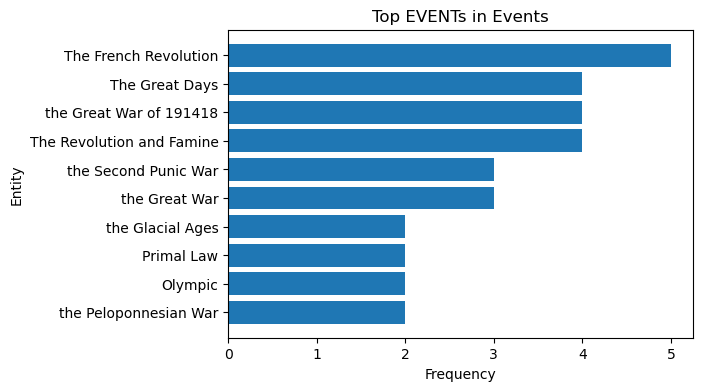

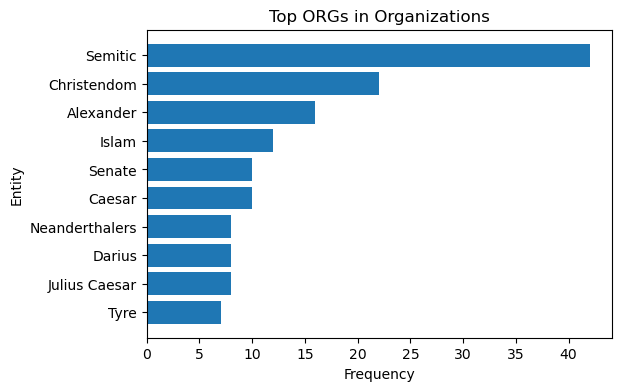

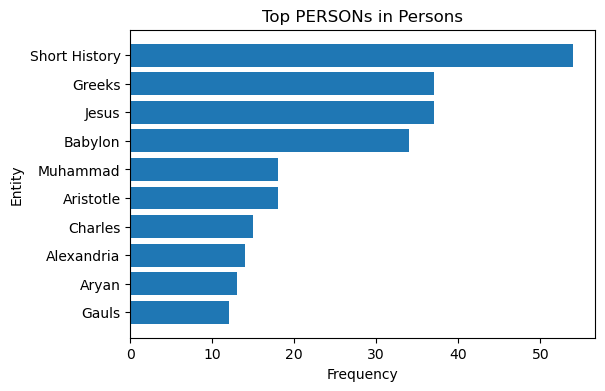

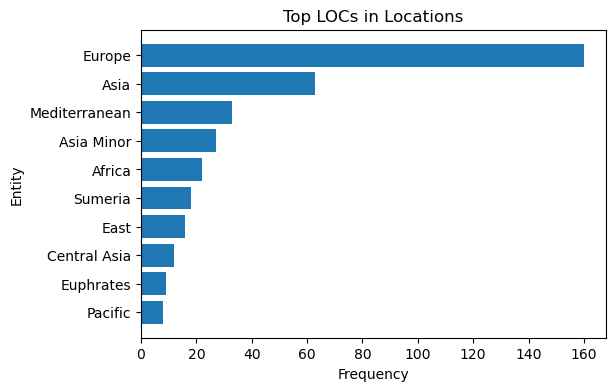

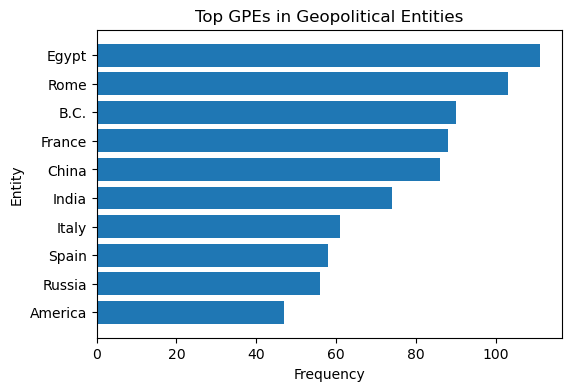

In [16]:
def extract_and_visualize_entities(text, entity_type, title):
    nlp = spacy.load("en_core_web_sm")  # Load the English language model in spaCy
    chunk_size = 100000 
    chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]  # Split the text into smaller chunks
    entities = []  # Initialize a list to store identified entities
    
    for chunk in chunks:
        doc = nlp(chunk)  # Process each chunk with spaCy to extract entities
        for ent in doc.ents:
            if ent.label_ == entity_type:
                entities.append(ent.text)  # Append identified entities of the specified type
    
    entity_frequencies = FreqDist(entities)  # Calculate the frequency distribution of identified entities
    N = 10  # Define the number of top entities to display
    top_entities = entity_frequencies.most_common(N)  # Get the most common entities
    entity_labels, entity_counts = zip(*top_entities)  # Separate labels and counts
    
    plt.figure(figsize=(6, 4))
    plt.barh(entity_labels, entity_counts)
    plt.xlabel('Frequency')
    plt.ylabel('Entity')
    plt.title(f'Top {entity_type}s in {title}') 
    plt.gca().invert_yaxis()  
    plt.show()  



# Entity Recognition
topics = {
    "Events": "EVENT",
    "Organizations": "ORG",
    "Persons": "PERSON",
    "Locations": "LOC",
    "Geopolitical Entities": "GPE",
}
nlp = spacy.load("en_core_web_sm")
for topic, entity_type in topics.items():
    extract_and_visualize_entities(cleaned_text, entity_type, topic)    


### Translation


In [17]:
def translate_text(text, target_language='fr'):
    # Split the input text into segments of 500 characters each
    segments = [text[i:i + 500] for i in range(0, len(text), 500)]

    # Create a Translator object with the target language specified
    translator = Translator(to_lang=target_language)

    translated_segments = []  # Initialize a list to store translated segments

    # Iterate through each segment and translate it
    for segment in segments:
        translation = translator.translate(segment)  # Perform translation on the segment
        translated_segments.append(translation)  # Append the translated segment to the list

    # Join the translated segments to form the final translated text
    translated_text = ' '.join(translated_segments)

    return translated_text  # Return the translated text as a string

# Translation
translated_summary = translate_text(final_summary, target_language='fr')

# Save the translated summary to a file
with open('Translated '+os.path.basename(file_path)+'.txt', 'w', encoding='utf-8') as file:
    file.write(translated_summary)

 

print("Translated Summary (French) saved to: translated_summary.txt")


Translated Summary (French) saved to: translated_summary.txt


### Sentiment analysis

In [18]:
import pandas as pd

# Create a DataFrame from your Excel file
data = pd.read_excel("data_for_use.xlsx")
# Drop rows with NaN values in any column
data.dropna(inplace=True)
data.head(5)


,Title,Review,State,Price
0,R Made Easy,Excellent,TX,19.99
1,R For Dummies,Poor,NY,15.99
2,R Made Easy,Excellent,NY,19.99
3,R Made Easy,Poor,FL,19.99
4,Secrets Of R For Advanced Students,Great,Texas,50.00


In [19]:


# Define a function to assign weighted values to sentiments
def assign_weighted_value(review):
    if review == "Excellent":
        return 5  # Assign the highest value for "Excellent"
    elif review == "Great":
        return 4  # Assign a high value for "Great"
    elif review == "Good":
        return 3  # Assign a moderate value for "Good"
    elif review == "Fair":
        return 2  # Assign a neutral value for "Fair"
    elif review == "Poor":
        return 1  # Assign a negative value for "Poor"
    else:
        return 0  # Assign a neutral value for any other sentiment or "NaN"

# Apply the weighted sentiment assignment to the "Review" column
data["Weighted Sentiment"] = data["Review"].apply(assign_weighted_value)

# Group the data by "Title" and calculate the weighted sentiment score for each book
book_sentiment_counts = data.groupby("Title")["Weighted Sentiment"].count()
book_weighted_sentiment_sum = data.groupby("Title")["Weighted Sentiment"].sum()

# Calculate the weighted average sentiment for each book
book_weighted_average_sentiment = book_weighted_sentiment_sum / book_sentiment_counts

# Define a function to map the weighted average sentiment to ratings
def map_to_rating(weighted_sentiment):
    if weighted_sentiment >= 4.5:
        return "Excellent"
    elif weighted_sentiment >= 3.5:
        return "Great"
    elif weighted_sentiment >= 2.5:
        return "Good"
    elif weighted_sentiment >= 1.5:
        return "Fair"
    else:
        return "Poor"

# Apply the rating assignment to the weighted average sentiment
book_ratings = book_weighted_average_sentiment.apply(map_to_rating)

# Display the ratings for each book
print(book_ratings)


Title
Fundamentals of R For Beginners       Good
R For Dummies                         Poor
R Made Easy                           Good
Secrets Of R For Advanced Students    Good
Top 10 Mistakes R Beginners Make      Good
Name: Weighted Sentiment, dtype: object
